## [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

### [Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)
- pandas.Series(data=None, index=None, dtype=None, name=None, copy=False)
    - data:
        - ndarray
        - python dict
        - scalar: repeated match the index
    - get: provide default value
    
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
    - data:
        - Dict of 1D ndarrays, lists, dicts, or Series (tuple as key in case of multiindex)
        - 2D ndarray
        - series
        
- delete column:
    - del df.colname
    - df.pop(colname)
 
- insert column at specific position:
    - DataFrame.insert(loc, column, value, allow_duplicates=False)
    
- assign new column in train:
    - allows you to easily create new columns that are potentially derived from existing columns
    - always returns a copy of the data, leaving the original DataFrame untouched.
    - This is common when using assign in a chain of operations.
  
- index:

|Operation|Syntax|Result|
|--|--|
|Select column|df[col]|Series|
|Select row by label|	df.loc[label]	|Series|
|Select row by integer location|	df.iloc[loc]|	Series|
|Slice rows	|df[5:10]	|DataFrame|
|Select rows by boolean vector	|df[bool_vec]	|DataFrame|

- Boardcasting:
    - When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus **broadcasting row-wise**. 
    - In the special case of working with time series data, and the DataFrame index also contains dates, the broadcasting will be column-wise.
    - When uncertain or more complicated case, always use **sub, add, mul, div** function with **axis** or **level** specified.

In [15]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])})

In [4]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [6]:
df.get('three', [3,3,3,3])

[3, 3, 3, 3]

In [7]:
df.get('one', [3,3,3,3])

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [11]:
df.assign(three=lambda x: x.one+x.two, four=lambda x: x.two*2)

,one,two,four,three
a,1.0,1.0,2.0,2.0
b,2.0,2.0,4.0,4.0
c,3.0,3.0,6.0,6.0
d,NaN,4.0,8.0,NaN


In [16]:
df.insert(1, 'three', [2,3,4,5])
df

,one,three,two
a,1.0,2,1.0
b,2.0,3,2.0
c,3.0,4,3.0
d,NaN,5,4.0


### [Essential basic functionality](https://pandas.pydata.org/pandas-docs/stable/basics.html)
- Series and Index also support the **divmod()** builtin. This function takes the floor division and modulo operation at the same time returning a two-tuple of the same type as the left hand side.
- Flexible Comparisons
    - eq, ne, lt, gt, le, and ge
- Boolean reductions:
    - empty
    - any(), all(): axis=0 by default
    - bool(): return single element pandas object
    - if df: will raise value error
- comparing if objects are equivalent
    - NaNs do not compare as equals
    - df.equals, test equality with NaN in corresponding locations treated as equal
- combining overlapping data sets where values in one are preferred over the other.
    - DataFrame.combine_first(other): 
        - Combine two DataFrame objects and default to non-null values in frame calling the method. 
        - Result index columns will be the union of the respective indexes and columns
        - combine_first is the general combine() 
    - DataFrame.combine(other, func, fill_value=None, overwrite=True)
- idxmax(), idxmin(), nlargest(), nsmallest()
- Descriptive statistics
    - aggregate(sum, mean), same size(cumsum, cumprod)
    - Note that methods like cumsum() and cumprod() preserve the location of NaN values. This is somewhat different from expanding() and rolling().
    
- reindex(index, method='bfill'/'ffill'/'nearest'): data alignment method
    - reindex().fillna() or .interpolate() would not check the monotonicity of the index like reindex method 
- The rename() method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.
    - rename(dict/func, axis)
- iteration:
    - series: values; dataframe: column labels
        - for col in df: ...
    - iterrows(): 
        - could be slow and should consider to replace it by vectorized solution or apply
        - modification is not inplace
    - iteritems():
        - series: index, scalar value
        - dataframe: column series
- Series.dt accessor:
    - year, quarter, month, week (in year), day (in month), dayofyear (in year), weekday (in week), weekday_name (in week), hour, second
- datatype:
    - dtypes: attribute
    - astype(): cannot coerce
    - pandas.to_numeric(arg, errors='raise', downcast=None)
        - errors: 'coerce', invalid parsing will be set as NaN
    - pandas.to_datetime()
        - errors: 'coerce', NaT
    - DataFrame.get_dtype_counts()
    - DataFrame.select_dtypes(include=None, exclude=None)

In [25]:
np.nan == np.nan

False

In [18]:
df = pd.DataFrame({'one' : pd.Series(np.random.randn(2), index=['b', 'c']),
                       'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                       'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

df2 = pd.DataFrame({'one' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                       'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                       'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

In [19]:
df

,one,three,two
a,NaN,NaN,-0.249691
b,0.302476,-0.137607,-1.180222
c,0.927756,-0.547539,0.392509
d,NaN,-1.380732,-0.384265


In [21]:
df2

,one,three,two
a,-2.151437,NaN,-0.486158
b,-1.159107,1.672146,-0.479247
c,-0.958583,-1.124962,-0.845614
d,-0.571276,0.268056,-0.380219


In [22]:
# if any element greater than df2 in corresponding position
df.gt(df2).any().any()

True

In [23]:
# we would like to combine two DataFrame objects where missing values in one DataFrame are conditionally filled with like-labeled values from the other DataFrame.
df.combine_first(df2)

,one,three,two
a,-2.151437,NaN,-0.249691
b,0.302476,-0.137607,-1.180222
c,0.927756,-0.547539,0.392509
d,-0.571276,-1.380732,-0.384265


In [24]:
# similar effect as np.where
df.combine(df2, lambda x, y: np.where(pd.isnull(x), y, x))

,one,three,two
a,-2.151437,NaN,-0.249691
b,0.302476,-0.137607,-1.180222
c,0.927756,-0.547539,0.392509
d,-0.571276,-1.380732,-0.384265


In [27]:
def subdtypes(dtype):
    subs = dtype.__subclasses__()
    if not subs:
        return dtype
    return [dtype, [subdtypes(dt) for dt in subs]]
subdtypes(np.generic)

[numpy.generic,
 [[numpy.number,
   [[numpy.integer,
     [[numpy.signedinteger,
       [numpy.int8,
        numpy.int16,
        numpy.int32,
        numpy.int64,
        numpy.int64,
        numpy.timedelta64]],
      [numpy.unsignedinteger,
       [numpy.uint8,
        numpy.uint16,
        numpy.uint32,
        numpy.uint64,
        numpy.uint64]]]],
    [numpy.inexact,
     [[numpy.floating,
       [numpy.float16, numpy.float32, numpy.float64, numpy.float128]],
      [numpy.complexfloating,
       [numpy.complex64, numpy.complex128, numpy.complex256]]]]]],
  [numpy.flexible,
   [[numpy.character, [numpy.bytes_, numpy.str_]],
    [numpy.void, [numpy.record]]]],
  numpy.bool_,
  numpy.datetime64,
  numpy.object_]]

### [Working with text data](https://pandas.pydata.org/pandas-docs/stable/text.html)
- str[0], str.get(0)
- str.lower(), str.upper(), capitalize(), str.title()
- str.len()
- str.strip(), str.lstrip(), str.rstrip()
- str.contains(pat, case=True):
    - pat: character sequence or regular expression
    - case: if case sensitive
- str.match()
- str.split(), str.rsplit
    - string to list
    - expand = True, return a data frame with multi-columns
    - n, limit the number of splits
- str.replace()
    - regular expressions: '^.a|dog'
    - case: if case sensitive
- str.extract(), str.extract_all()
    - the extractall method returns every match. The result of extractall is always a DataFrame with a MultiIndex on its rows. The last level of the MultiIndex is named match and indicates the order in the subject.
- str.slice()
- str.startswith(), str.endswith()
- str.cat(sep=',', na_rep='-'): concatenate a series or index to string
- str.get_dummies(sep='|')

In [36]:
# rm dollar sign
dollars = pd.Series(['12', '-$10', '$10,000'])
# We need to escape the special character (for >1 len patterns)
dollars.str.replace('\$', '')

0        12
1       -10
2    10,000
dtype: object

In [49]:
# Reverse every lowercase alphabetic word
pat='[A-Za-z]+'
repl=lambda x:x.group(0)[::-1]
pd.Series(['foo 123', 'bar baz', np.nan]).str.replace(pat, repl)

0    oof 123
1    rab zab
2        NaN
dtype: object

In [53]:
pat = r"(?P<one>\w+) (?P<two>\w+) (?P<three>\w+)"
repl = lambda m: m.group('two').swapcase()
pd.Series(['Foo Bar Baz', np.nan]).str.replace(pat, repl)

0    bAR
1    NaN
dtype: object

In [58]:
pd.Series(['a1', 'b2', 'c3']).str.extract('(?P<letter>[ab])(?P<digit>\d)', expand=False)

,letter,digit
0,a,1
1,b,2
2,NaN,NaN


In [59]:
pd.Series(['a1', 'b2', 'c3']).str.extract('(?P<letter>[ab])?(?P<digit>\d)', expand=False)

,letter,digit
0,a,1
1,b,2
2,NaN,3


In [60]:
s = pd.Series(['a', 'a|b', np.nan, 'a|c'])
s.str.get_dummies(sep='|')

,a,b,c
0,1,0,0
1,1,1,0
2,0,0,0
3,1,0,1


### [Indexing and selecting data](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
- DataFrame.where(cond, other=nan, inplace=False, axis=None）
    - select rows
- DataFrame.mask()
    - opposite of mask
- DataFrame.query()
    - query columns
    - ilevel_0 stands for index of level=0
    - in and not in
    - Comparing a list of values to a column using ==/!= works similarly to in/not in
    - negate boolean expressions with the word not or the ~ operator
- index
    - reindex()
    - DataFrame.set_index(keys, drop=True, append=False, inplace=False)
        - drop: if drop column used as new axis
        - append: whether append to existing index
    - DataFrame.reset_index(level=None, drop=False)
        - drop: if insert the dropped index as column

In [70]:
df=pd.DataFrame(np.random.normal(size=(3,2)), columns=list('ab'))

In [73]:
df

,a,b
0,0.391709,0.048908
1,-0.459661,-1.710848
2,1.107214,0.678198


In [72]:
# default other is nan
df.where(df>0)

,a,b
0,0.391709,0.048908
1,NaN,NaN
2,1.107214,0.678198


In [74]:
# if negative, negate to make it positive
df.where(df>0, -df)

,a,b
0,0.391709,0.048908
1,0.459661,1.710848
2,1.107214,0.678198


In [76]:
df.where(df>0, df.a, axis=0)

,a,b
0,0.391709,0.048908
1,-0.459661,-0.459661
2,1.107214,0.678198


In [78]:
df.mask(df>0)

,a,b
0,NaN,NaN
1,-0.459661,-1.710848
2,NaN,NaN


In [79]:
df.mask(df>0,-df)

,a,b
0,-0.391709,-0.048908
1,-0.459661,-1.710848
2,-1.107214,-0.678198


In [81]:
df.query('a>2*b')

,a,b
0,0.391709,0.048908
1,-0.459661,-1.710848


In [82]:
df.query('a>0')

,a,b
0,0.391709,0.048908
2,1.107214,0.678198


In [83]:
df.query('index>a')

,a,b
1,-0.459661,-1.710848
2,1.107214,0.678198


In [91]:
s=pd.DataFrame(np.arange(4), index=pd.MultiIndex.from_product([list('ab'), list('cd')]))
s.query("ilevel_0=='a'")

0
a c  0
  d  1

In [92]:
 df = pd.DataFrame({'a': list('aabbccddeeff'), 'b': list('aaaabbbbcccc'),
                    'c': np.random.randint(5, size=12),
                    'd': np.random.randint(9, size=12)})

In [97]:
df.query('a in b and d > c')

,a,b,c,d
1,a,a,4,7
2,b,a,3,8
5,c,b,2,3


In [101]:
df.query('c == [3,4]')

,a,b,c,d
1,a,a,4,7
2,b,a,3,8
6,d,b,4,3
11,f,c,4,5


### [Multi-index](https://pandas.pydata.org/pandas-docs/stable/advanced.html)
- create multi-index
    - MultiIndex.from_arrays(arrays, sortorder=None, names=None)
    - MultiIndex.from_tuples(tuples, sortorder=None, names=None)
    - MultiIndex.from_product(iterables, sortorder=None, names=None)
    - As a convenience, you can pass a list of arrays directly into Series or DataFrame to construct a MultiIndex automatically

- Index.get_level_values(level)
- DataFrame.swaplevel(i=-2, j=-1, axis=0)
- DataFrame.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
- slice(None) to select all the contents of that level
    - use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).

In [103]:
def mklbl(prefix,n):
    return ["%s%s" % (prefix,i)  for i in range(n)]

miindex = pd.MultiIndex.from_product([mklbl('A',4),
                                       mklbl('B',2),
                                       mklbl('C',4),
                                       mklbl('D',2)]) 
micolumns = pd.MultiIndex.from_tuples([('a','foo'),('a','bar'),
                                        ('b','foo'),('b','bah')],
                                       names=['lvl0', 'lvl1'])
 
dfmi = pd.DataFrame(np.arange(len(miindex)*len(micolumns)).reshape((len(miindex),len(micolumns))),
                     index=miindex,
                     columns=micolumns).sort_index().sort_index(axis=1)
idx = pd.IndexSlice
dfmi.loc[idx[:, :, ['C1', 'C3']], idx[:, 'foo']]

lvl0           a    b
lvl1         foo  foo
A0 B0 C1 D0    8   10
         D1   12   14
      C3 D0   24   26
         D1   28   30
   B1 C1 D0   40   42
         D1   44   46
      C3 D0   56   58
         D1   60   62
A1 B0 C1 D0   72   74
         D1   76   78
      C3 D0   88   90
         D1   92   94
   B1 C1 D0  104  106
         D1  108  110
      C3 D0  120  122
         D1  124  126
A2 B0 C1 D0  136  138
         D1  140  142
      C3 D0  152  154
         D1  156  158
   B1 C1 D0  168  170
         D1  172  174
      C3 D0  184  186
         D1  188  190
A3 B0 C1 D0  200  202
         D1  204  206
      C3 D0  216  218
         D1  220  222
   B1 C1 D0  232  234
         D1  236  238
      C3 D0  248  250
         D1  252  254

### Computational tools
- pct_change()
- corr()
    - method: pearson, kendall (tau), spearman (rank correlation)
- rank()
    - method: min, max, average, dense, first
- window functions
    - DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
        - window: offset, size of the moving window
        - min_periods: minimum number of observations in window required to have a value, otherwise, NA. Default is the window length.
        - center, set the labels at the center of the window, by default, it is set to the right edge of the window
        - win_type: if none, all points are evenly weighted.
            - gaussian, needs std
        - on: column on which to calculate the rolling window.
        - rolling by time: df.rollong('2s')
    - DataFrame.expanding(min_periods=1, center=False, axis=0): Provides expanding transformations, which yields the value of the statistic with all the data available up to that point in time.
        - cumsum() returns NaN, expanding doesn't. s.cumsum().fillna(method='ffill') gives same result as s.expanding().sum()
    - DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)
        - smoothing alpha: $y_t = (1-\alpha)y_{t-1}+\alpha x_t$
        - Span corresponds to what is commonly called an “N-day EW moving average”: $\alpha = \frac{2}{s+1}$ 
        - Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2, $\alpha = 1/(1+c)$.
        - Half-life is the period of time for the exponential weight to reduce to one half.

In [104]:
ser = pd.Series(np.random.randn(8))
ser.pct_change()

0         NaN
1   -1.298054
2   -8.399534
3   -0.292693
4   -1.851039
5   -1.493192
6    1.332894
7   -0.708226
dtype: float64

In [105]:
df = pd.DataFrame(np.random.randn(1000, 4),
                    index=pd.date_range('1/1/2000', periods=1000),
                     columns=['A', 'B', 'C', 'D'])

In [106]:
covs = df[['B', 'C', 'D']].rolling(window=50).cov(df[['A', 'B', 'C']], pairwise=True)
covs.loc['2002-09-22':]

B         C         D
2002-09-22 A -0.163534 -0.022224  0.182525
           B  1.189378  0.035614 -0.108813
           C  0.035614  0.915254  0.020743
2002-09-23 A -0.148044 -0.034540  0.176004
           B  1.193506  0.037661 -0.103330
           C  0.037661  0.908386  0.012781
2002-09-24 A -0.148905 -0.019102  0.163705
           B  1.193187  0.039092 -0.097266
           C  0.039092  0.909898 -0.034017
2002-09-25 A -0.120324  0.015409  0.173202
           B  1.053644  0.005024 -0.086253
           C  0.005024  0.911390 -0.027141
2002-09-26 A -0.086407  0.048259  0.142673
           B  1.025125 -0.025411 -0.021698
           C -0.025411  0.879524  0.033287

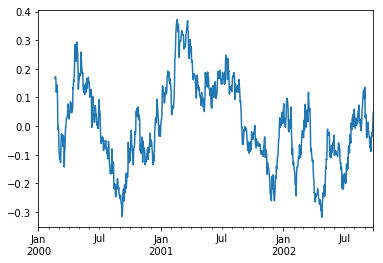

In [109]:
import matplotlib.pyplot as plt
% matplotlib inline
covs.unstack(1)[('C', 'A')].plot()
plt.show()

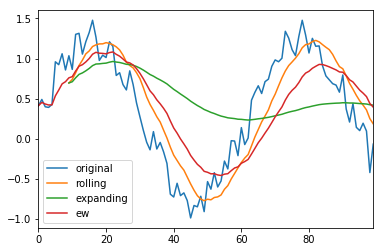

In [110]:
x = np.linspace(0,10,100)
y = np.sin(x)+0.5*np.random.random(100)
s = pd.Series(y)
ax = s.plot(label='original')
s.rolling(window=10).mean().plot(ax=ax, label='rolling')
s.expanding(10).mean().plot(ax=ax, label='expanding')
s.ewm(com=10).mean().plot(ax=ax, label='ew')
plt.legend()
plt.show()

### [Working with missing values](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)
- If you want to consider inf and -inf to be “NA” in computations, you can set pandas.options.mode.use_inf_as_na = True.
- The sum of an empty or all-NA Series or column of a DataFrame is 0.
- The product of an empty or all-NA Series or column of a DataFrame is 1.
- NA groups in GroupBy are automatically excluded.
- fillna(value=None, method=None, axis=None, inplace=False)
    - method : {‘backfill’, ‘bfill’, ‘pad’/‘ffill’, None}, default None
- dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    - how: {'any', 'all'}
    - thresh: required number of non-NA values
- DataFrame.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None, \*\*kwargs)
    - method: ‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’
    - limit_area:
        - None: no restriction
        - inside: only interpolate
        - outside: only extrapolate
- DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
    - to_replace: numeric, list, dict, regex
    - method : {‘pad’, ‘ffill’, ‘bfill’, None}: The method to use when for replacement, when to_replace is a scalar, list or tuple and value is None.

In [126]:
d = pd.DataFrame({'a': list(range(4)), 'b': list('ab..'), 'c': ['a_test', 'b', np.nan, 'd']})

In [132]:
d

,a,b,c
0,0,a,a_test
1,1,b,b
2,2,.,NaN
3,3,.,d


In [136]:
# why no _test?
d.replace(['\.', '(a)_test'], ['dot', '\1stuff'], regex=True)

,a,b,c
0,0,a,stuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


### [Groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html):
- split
- apply
    - aggregation
    - transform (same size)/apply (could be different size)
    - filter
- combine


- DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True)
    - by: mapping, function, label, or list of labels
        - If by is a function, it’s called on each value of the object’s index.
        - If a dict or Series is passed, the Series or dict VALUES will be used to determine the groups 
    - sort: sort group keys, default true
    - axis: split by rows or columns
    - as_index: For aggregated output, return object with group labels as the index.
    
**groupby object**:
- gb.first(), sum(), size(), describe(), ffill(), head(), nth(), cumcount(), ngroup(ascending) (get group id)...: first,... item in each group
- gb.get_group(group_name)
- attributes
    - gb.groups
    - gb.ngroups
- len(gb)
- iteratable, for name, group in gb
- agg: use dict to specify functions for different columns
    - chain with rename()
- transform: 
    - Same size
    - Operate column-by-column on the group chunk (unlike map, which is element-wise)
    - not perform in-place operations on the group chunk
- filter: filter groups
- apply: Some operations on the grouped data might not fit into either the aggregate or transform categories. Or, you may simply want GroupBy to infer how to combine the results.
    - return different size: descirbe(), return dataframe
    - work as agg/transform/filter
- gb.boxplot()
- Group DataFrame columns, compute a set of metrics and return a named Series. The Series name is used as the name for the column index. This is especially useful in conjunction with reshaping operations such as stacking in which the column index name will be used as the name of the inserted column

In [137]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [141]:
# def get_letter_type(letter):
#     if letter.lower() in 'aeiou':
#         return 'vowel'
#     else:
#         return 'consonant'
df.groupby(lambda x: 'vowel' if x.lower() in 'aoiue' else 'consonant', axis=1)
# df.groupby(get_letter_type, axis=1)

In [144]:
df = pd.DataFrame({'a':[1,0,0], 'b':[0,1,0], 'c':[1,0,0], 'd':[2,3,4]})
df

,a,b,c,d
0,1,0,1,2
1,0,1,0,3
2,0,0,0,4


In [143]:
df.groupby(df.sum(), axis=1).groups

{1: Index(['a', 'b', 'c'], dtype='object'), 9: Index(['d'], dtype='object')}

In [145]:
df.groupby(df.sum(), axis=1).sum()

,1,9
0,2,2
1,1,3
2,0,4


In [152]:
dfg = pd.DataFrame({"A": [1, 1, 2, 3, 2], "B": list("aaaba")})
dfg.groupby([0,0,1,1,1]).ngroup()

0    0
1    0
2    1
3    1
4    1
dtype: int64

In [155]:
dfg.groupby(['A', 'B']).ngroup()

0    0
1    0
2    1
3    2
4    1
dtype: int64

In [154]:
dfg.groupby(['A', [0,0,0,1,1]]).ngroup()

0    0
1    0
2    1
3    3
4    2
dtype: int64

In [158]:
dfg.groupby(dfg.index//2).ngroup()

0    0
1    0
2    1
3    1
4    2
dtype: int64